## IMPORTS

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import pickle
import joblib
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras import layers
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn import metrics 

import warnings
warnings.filterwarnings('ignore')

In [12]:
from sklearn.preprocessing import StandardScaler,RobustScaler
sc = StandardScaler()
rb = RobustScaler()

## READING DATA

In [13]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

#targets = tf.keras.utils.to_categorical(train['Class'], num_classes=11, dtype='float32')
test_targets  = pd.read_csv('sample_submission.csv')
test_targets.drop('Id',axis=1,inplace=True)

In [14]:
#count class values 
train['Class'].value_counts()

Class
10    3959
6     2069
9     2019
8     1483
5     1157
1     1098
2     1018
0      500
7      461
3      322
4      310
Name: count, dtype: int64

In [15]:
'''class_10_rows = train[train['Class'] == 10]

rows_to_remove = class_10_rows.sample(n=1500, random_state=42)  # Change the random_state as needed

# Use the Pandas 'drop' function to remove the selected rows
train.drop(rows_to_remove.index , inplace=True)
'''


"class_10_rows = train[train['Class'] == 10]\n\nrows_to_remove = class_10_rows.sample(n=1500, random_state=42)  # Change the random_state as needed\n\n# Use the Pandas 'drop' function to remove the selected rows\ntrain.drop(rows_to_remove.index , inplace=True)\n"

In [16]:
'''X = train.drop(columns=['Class'])
y = train['Class']

# Initialize the RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)  # Adjust the strategy as needed

# Resample the data
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Create a new DataFrame with the resampled data
train = pd.concat([X_resampled, y_resampled], axis=1)

#make this to csv
train.to_csv('train_resampled.csv',index=False)'''

"X = train.drop(columns=['Class'])\ny = train['Class']\n\n# Initialize the RandomOverSampler\noversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)  # Adjust the strategy as needed\n\n# Resample the data\nX_resampled, y_resampled = oversampler.fit_resample(X, y)\n\n# Create a new DataFrame with the resampled data\ntrain = pd.concat([X_resampled, y_resampled], axis=1)\n\n#make this to csv\ntrain.to_csv('train_resampled.csv',index=False)"

In [17]:
train_targets = train['Class']

In [18]:
#count the number of instances of each class
train['Class'].value_counts()

Class
10    3959
6     2069
9     2019
8     1483
5     1157
1     1098
2     1018
0      500
7      461
3      322
4      310
Name: count, dtype: int64

In [19]:
music_genres = {
    1: "Blues",
    2: "Classical",
    3: "Country",
    4: "Disco",
    5: "Hip-hop",
    6: "Jazz",
    7: "Metal",
    8: "Pop",
    9: "Reggae",
    10: "Rock"
}

In [20]:
train['Class'] = train['Class'].map(music_genres)

In [21]:
train.isna().sum()

Id                       0
Artist Name              0
Track Name               0
Popularity             333
danceability             0
energy                   0
key                   1609
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3541
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                  500
dtype: int64

## DATA VISUALIZATION

In [22]:
train['Class'].value_counts()

Class
Rock         3959
Jazz         2069
Reggae       2019
Pop          1483
Hip-hop      1157
Blues        1098
Classical    1018
Metal         461
Country       322
Disco         310
Name: count, dtype: int64

In [23]:
train.describe()

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
count,14396.000000,14063.000000,14396.000000,14396.000000,12787.000000,14396.000000,14396.000000,14396.000000,14396.000000,10855.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000
mean,7198.500000,44.525208,0.543105,0.662422,5.953781,-7.900852,0.640247,0.080181,0.246746,0.178129,0.195782,0.486379,122.695372,2.000942e+05,3.924354
std,4155.911573,17.418940,0.165517,0.235967,3.200013,4.057362,0.479944,0.085157,0.310922,0.304266,0.159258,0.239476,29.538490,1.116891e+05,0.359520
min,1.000000,1.000000,0.059600,0.001210,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000
25%,3599.750000,33.000000,0.432000,0.508000,3.000000,-9.538000,0.000000,0.034800,0.004280,0.000088,0.097275,0.299000,99.799000,1.654458e+05,4.000000
50%,7198.500000,44.000000,0.545000,0.699000,6.000000,-7.013500,1.000000,0.047100,0.081450,0.003920,0.129000,0.480500,120.060000,2.089410e+05,4.000000
75%,10797.250000,56.000000,0.658000,0.861000,9.000000,-5.162000,1.000000,0.083100,0.432250,0.201000,0.256000,0.672000,141.988250,2.522470e+05,4.000000
max,14396.000000,100.000000,0.989000,1.000000,11.000000,1.342000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,1.477187e+06,5.000000


In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

In [25]:
test.describe()

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
count,3600.000000,3505.000000,3600.000000,3600.000000,3195.000000,3600.000000,3600.000000,3600.000000,3600.000000,2764.000000,3600.000000,3600.000000,3600.000000,3.600000e+03,3600.000000
mean,16196.500000,44.459629,0.544744,0.664197,5.947105,-7.949879,0.622778,0.077813,0.248425,0.175336,0.197720,0.485527,122.335063,2.033447e+05,3.922778
std,1039.374812,17.461328,0.169257,0.233010,3.184676,4.016468,0.484759,0.076914,0.309510,0.303238,0.159040,0.243082,29.705640,1.131593e+05,0.369936
min,14397.000000,1.000000,0.064600,0.000020,1.000000,-34.797000,0.000000,0.022700,0.000001,0.000001,0.014400,0.018300,48.718000,9.871167e-01,1.000000
25%,15296.750000,33.000000,0.430000,0.512000,3.000000,-9.532500,0.000000,0.034800,0.004488,0.000093,0.098575,0.291000,98.515750,1.688360e+05,4.000000
50%,16196.500000,44.000000,0.549000,0.703000,6.000000,-7.043500,1.000000,0.048750,0.080850,0.003755,0.131000,0.481000,120.091000,2.103355e+05,4.000000
75%,17096.250000,56.000000,0.664000,0.859000,9.000000,-5.282250,1.000000,0.082800,0.441250,0.197250,0.265250,0.674000,141.846750,2.533958e+05,4.000000
max,17996.000000,97.000000,0.970000,0.999000,11.000000,1.355000,1.000000,0.886000,0.996000,0.973000,1.000000,0.984000,214.396000,1.412451e+06,5.000000


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  3600 non-null   int64  
 1   Artist Name         3600 non-null   object 
 2   Track Name          3600 non-null   object 
 3   Popularity          3505 non-null   float64
 4   danceability        3600 non-null   float64
 5   energy              3600 non-null   float64
 6   key                 3195 non-null   float64
 7   loudness            3600 non-null   float64
 8   mode                3600 non-null   int64  
 9   speechiness         3600 non-null   float64
 10  acousticness        3600 non-null   float64
 11  instrumentalness    2764 non-null   float64
 12  liveness            3600 non-null   float64
 13  valence             3600 non-null   float64
 14  tempo               3600 non-null   float64
 15  duration_in min/ms  3600 non-null   float64
 16  time_s

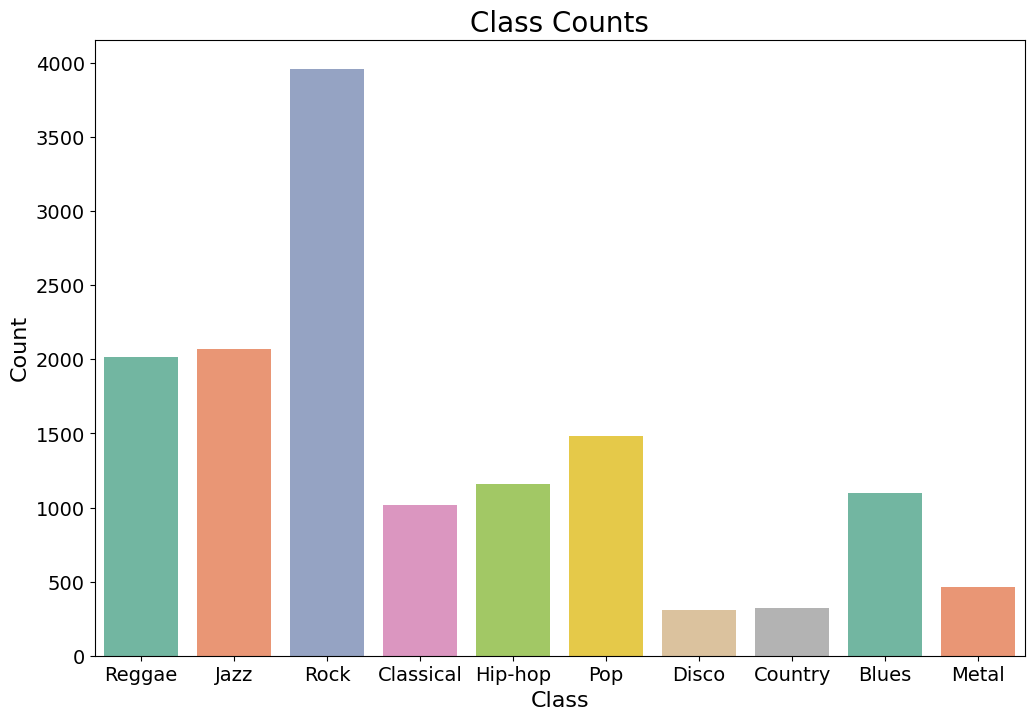

In [27]:
# plot the counts of each genre and make all the bars in the graph different colors
plt.figure(figsize=(12,8))
sns.countplot(x='Class', data=train, palette='Set2')
plt.title('Class Counts', fontsize=20)
plt.xlabel('Class', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


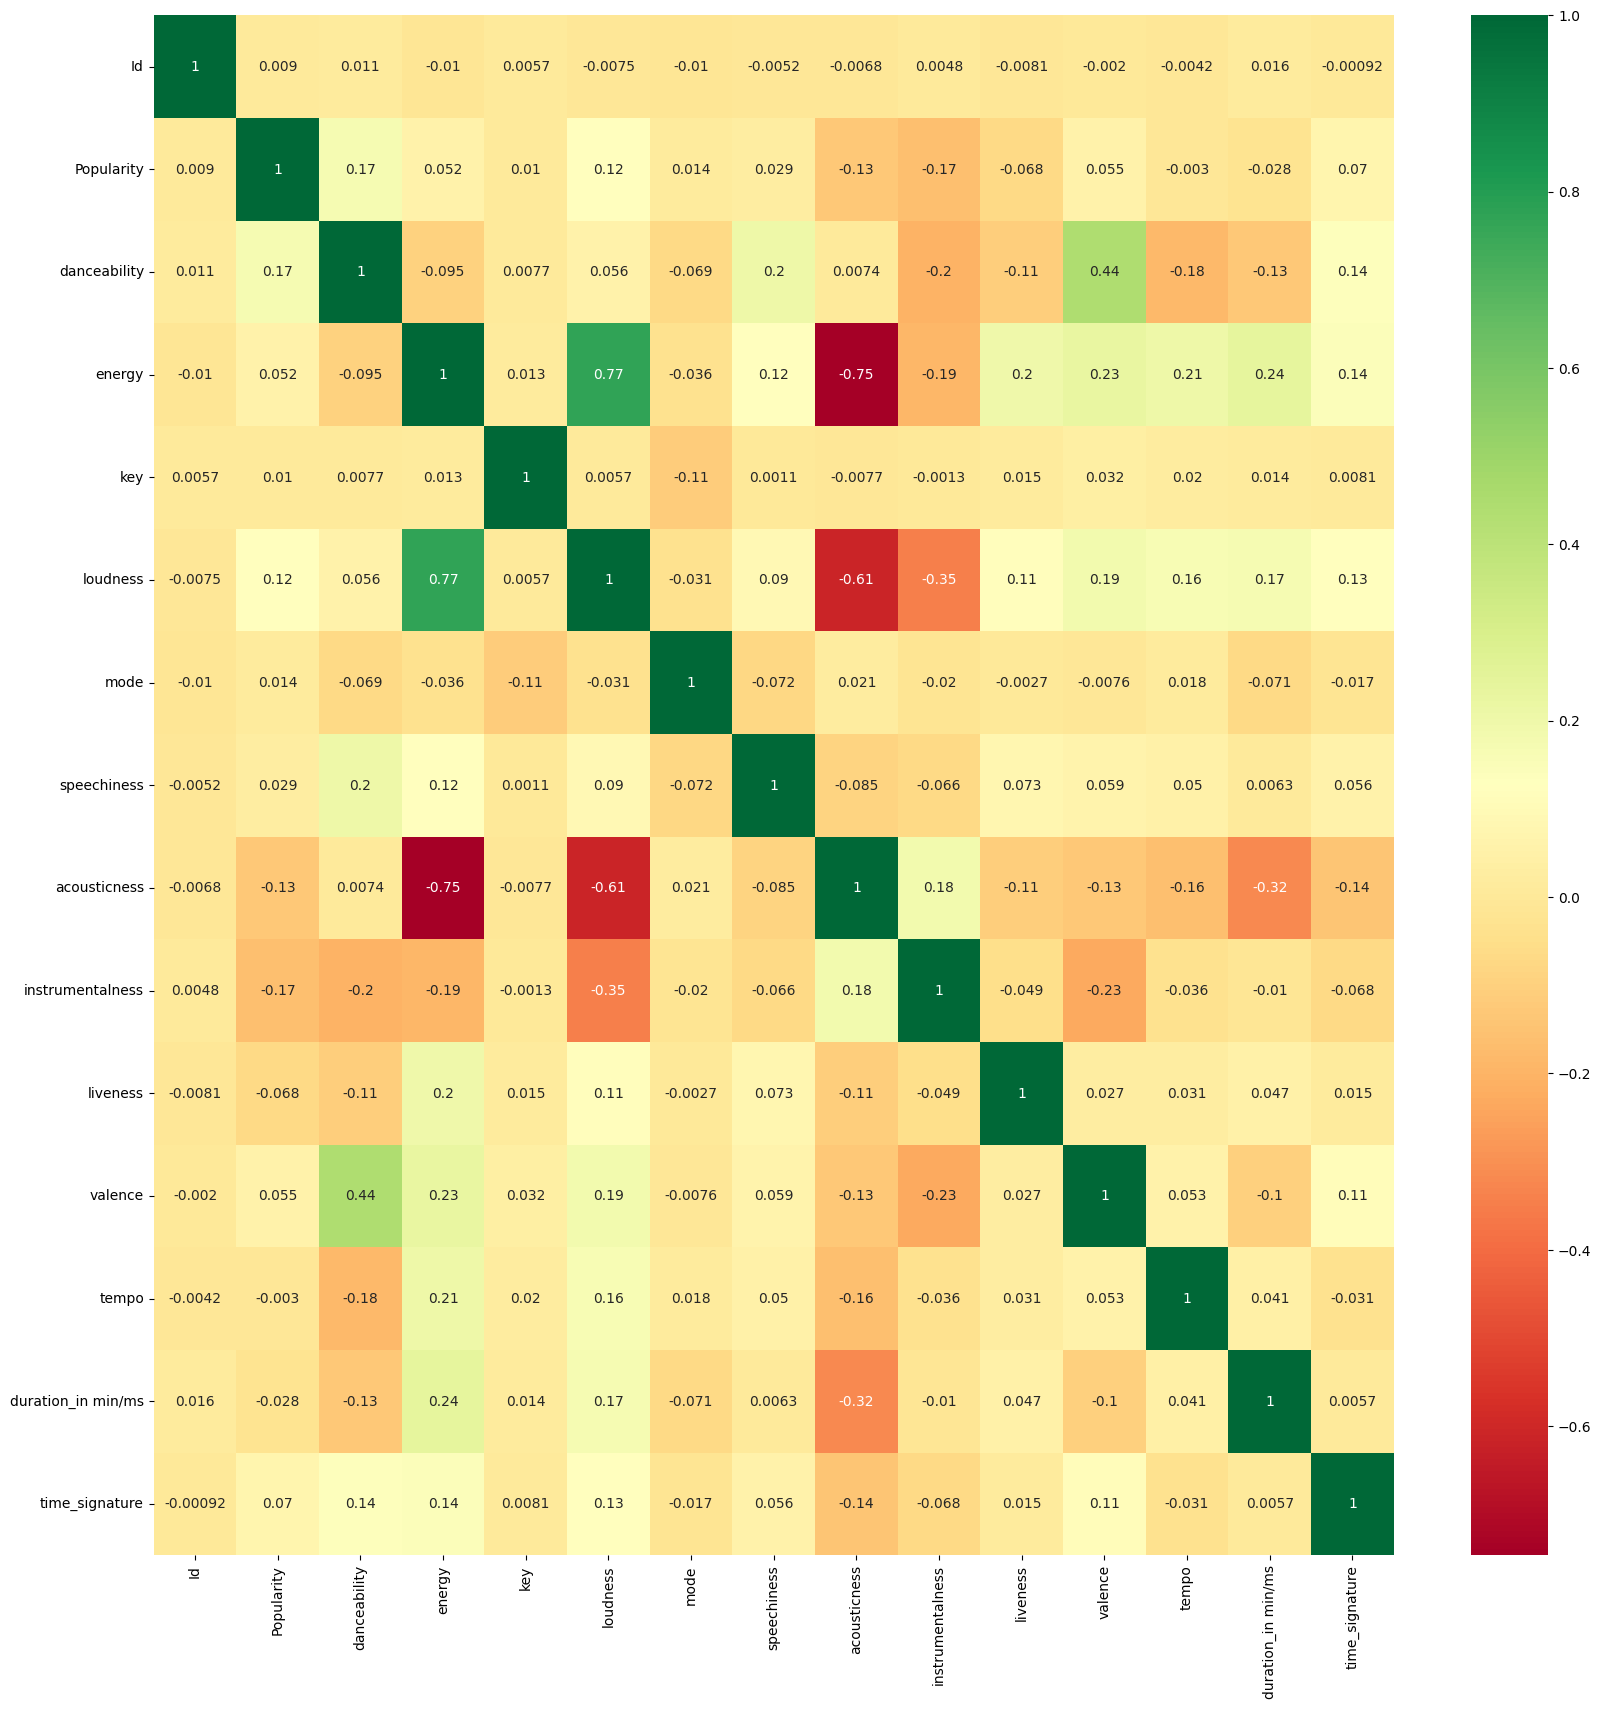

In [28]:
#drop the target variable and artist ,id , track name ,release date columns
temp = train.drop(['Class','Artist Name','Track Name'],axis=1)

corr = temp.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="RdYlGn")
plt.show()



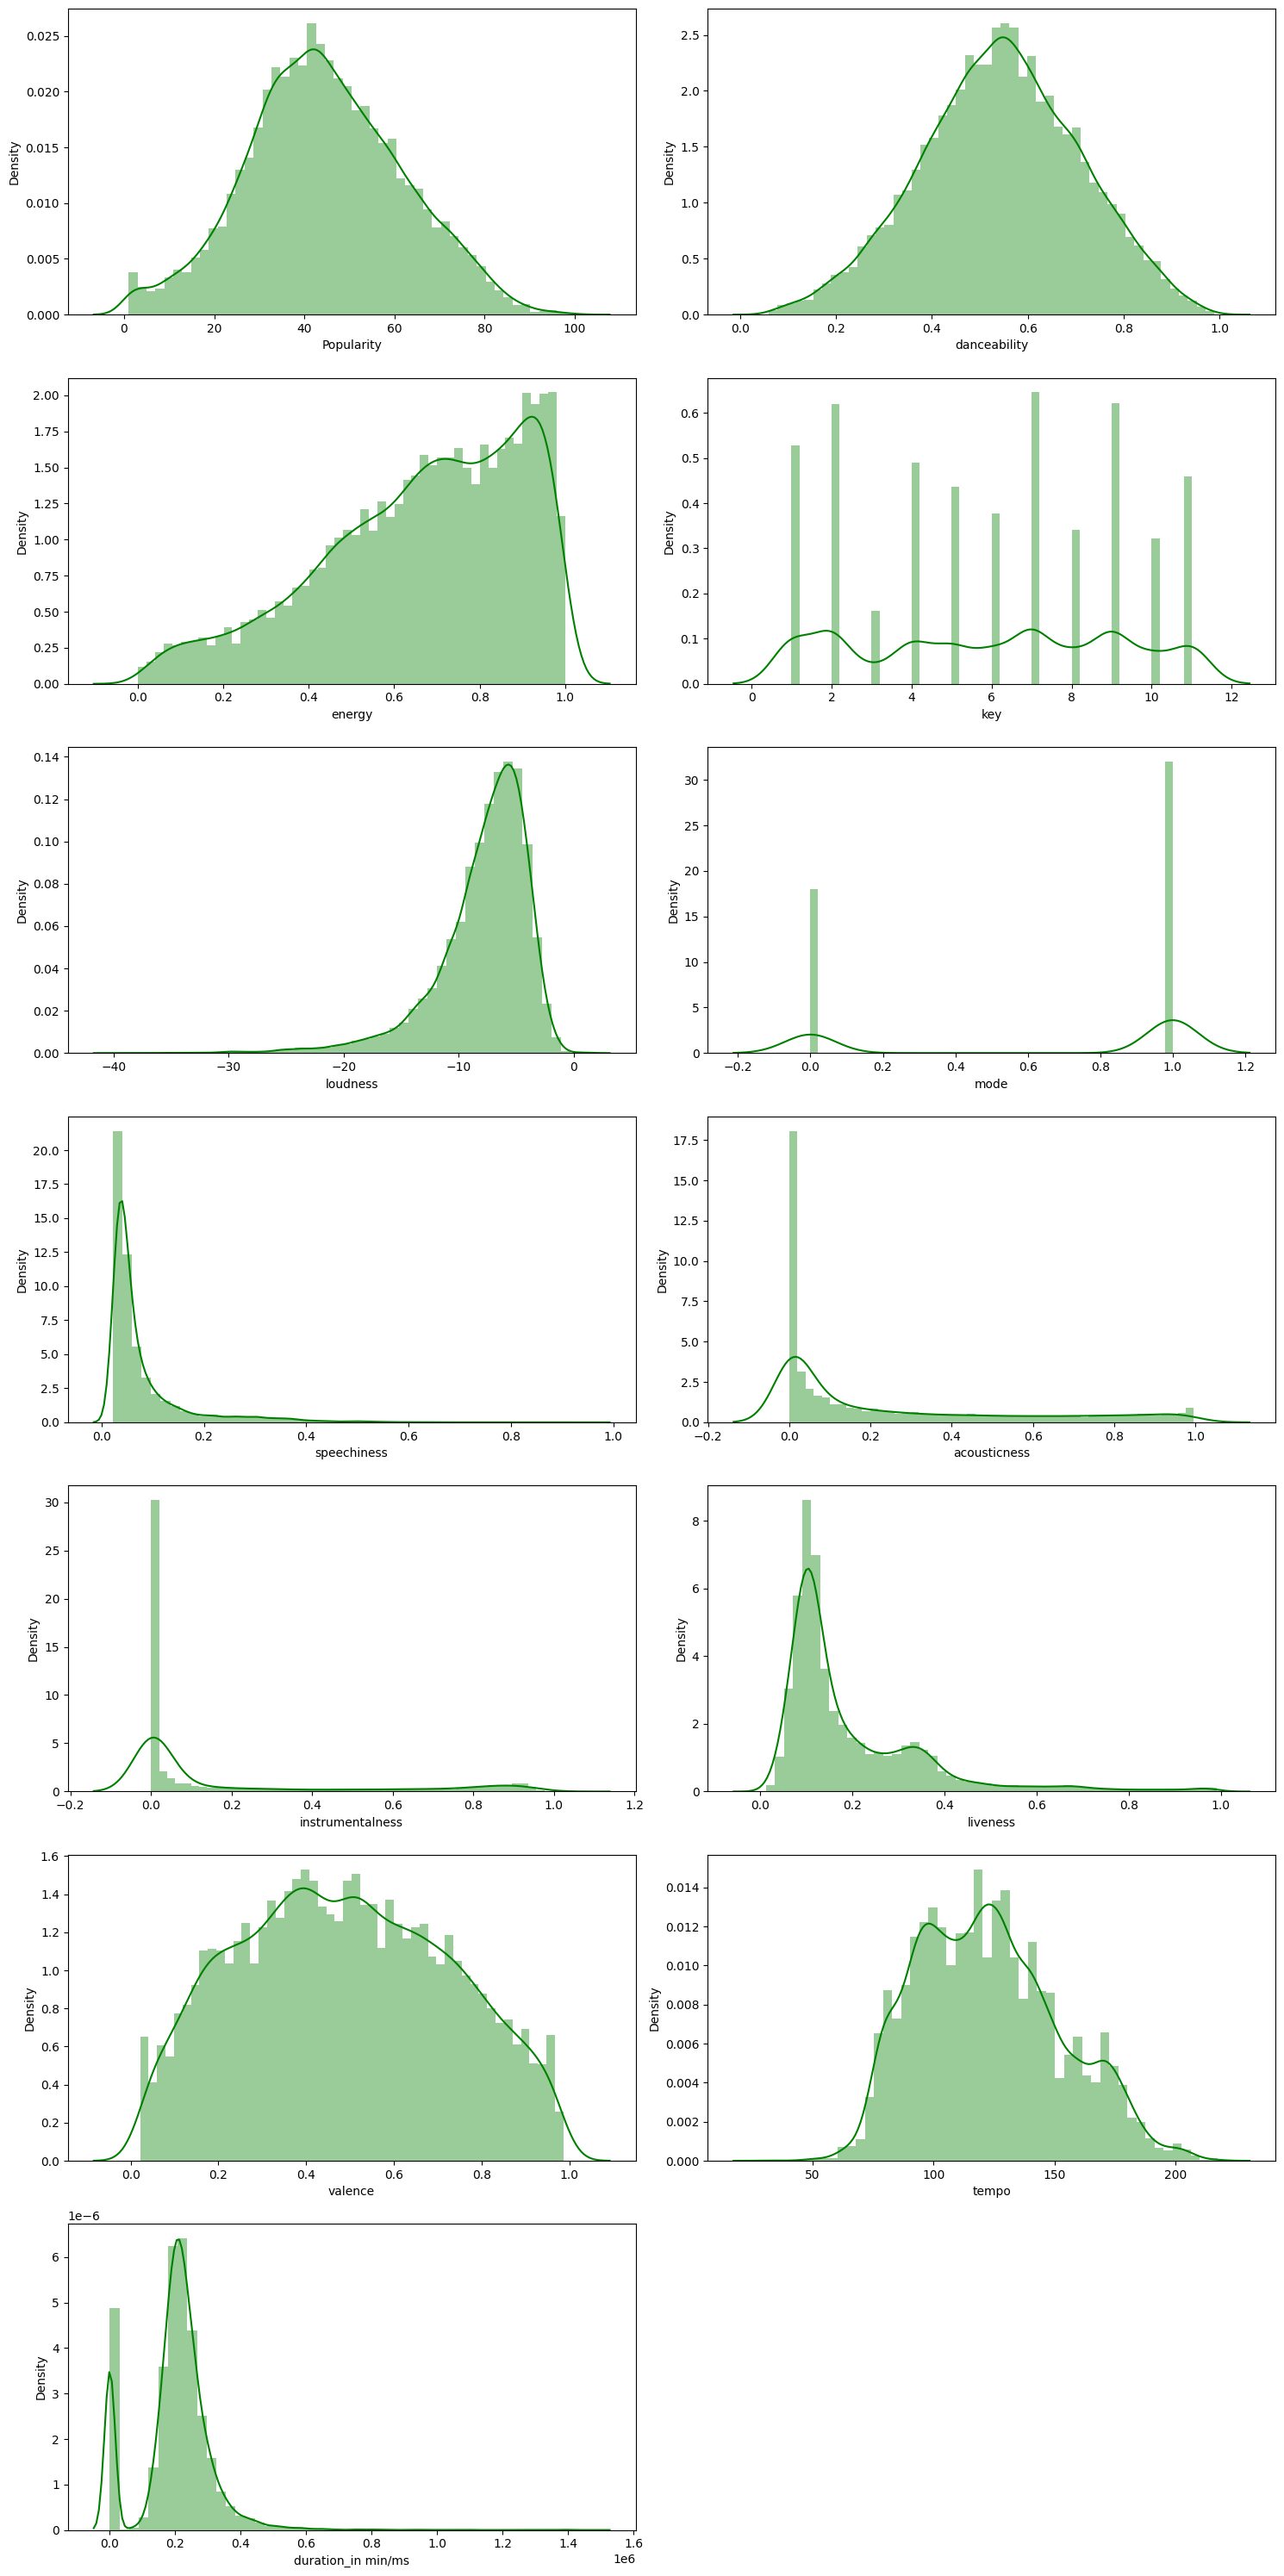

In [29]:
# I want to see the distribution of the features
fig = plt.figure(figsize=(15, 30))
for i in range(1, 14):
    fig.add_subplot(7, 2, i)
    sns.distplot(temp.iloc[:, i], color='green', bins=50)
plt.tight_layout()
plt.show()


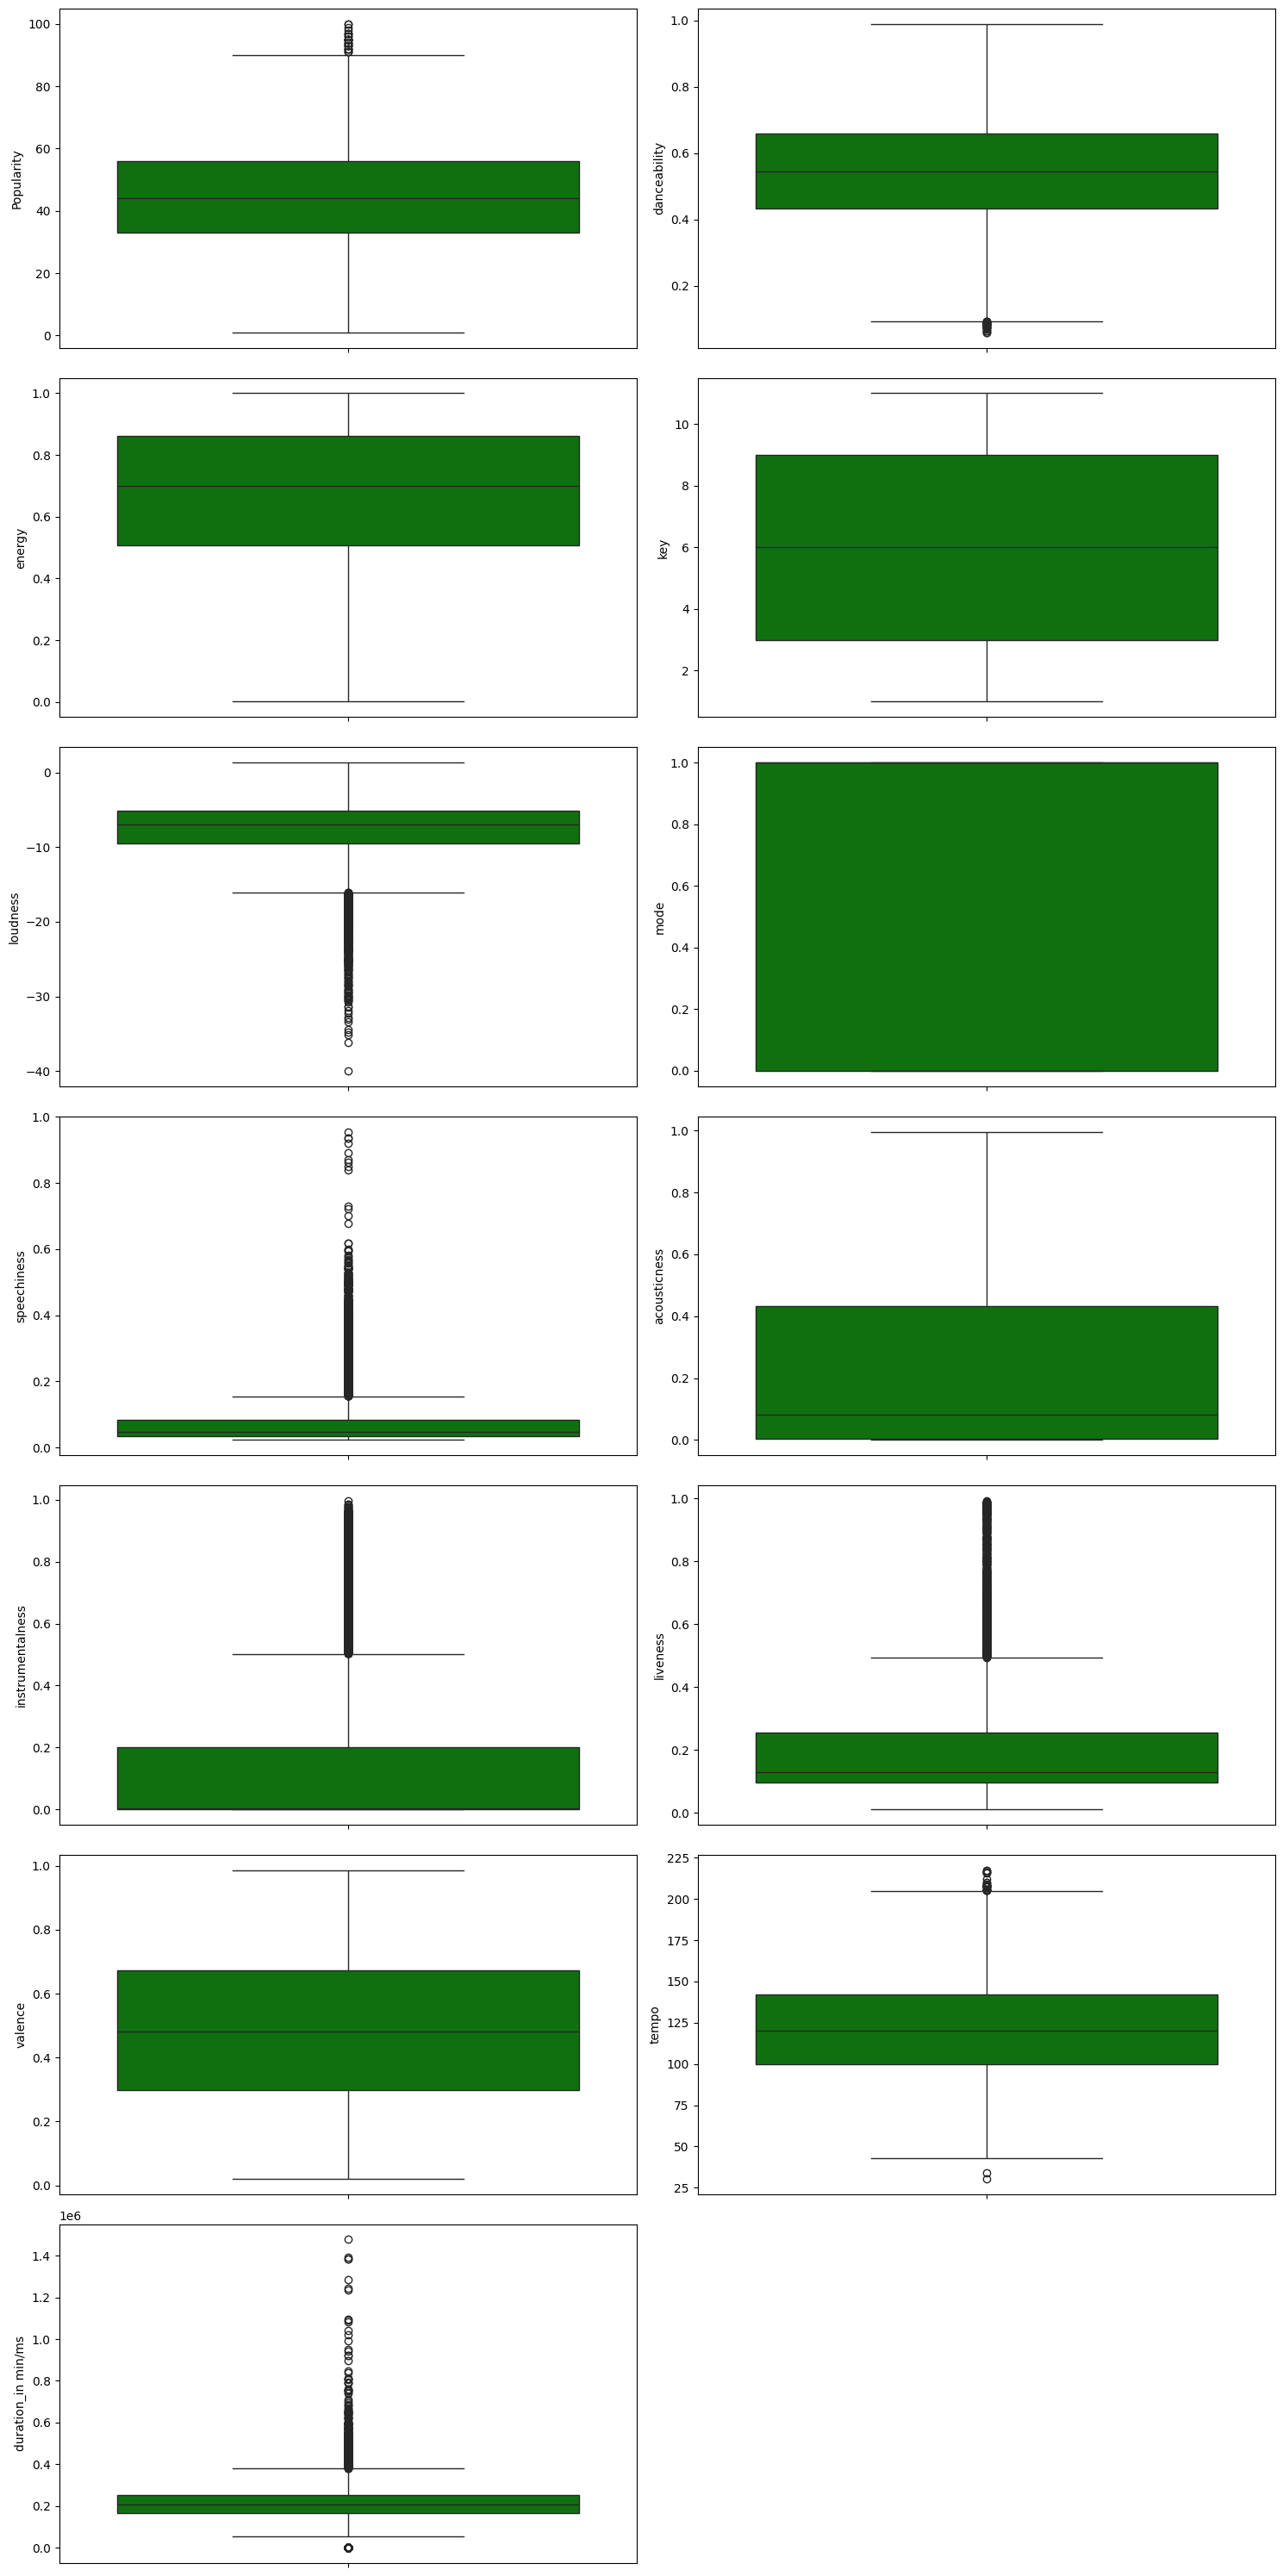

In [30]:
# some other plots
fig = plt.figure(figsize=(15, 30))
for i in range(1, 14):
    fig.add_subplot(7, 2, i)
    sns.boxplot(y=temp.iloc[:, i], color='green')
plt.tight_layout()
plt.show()


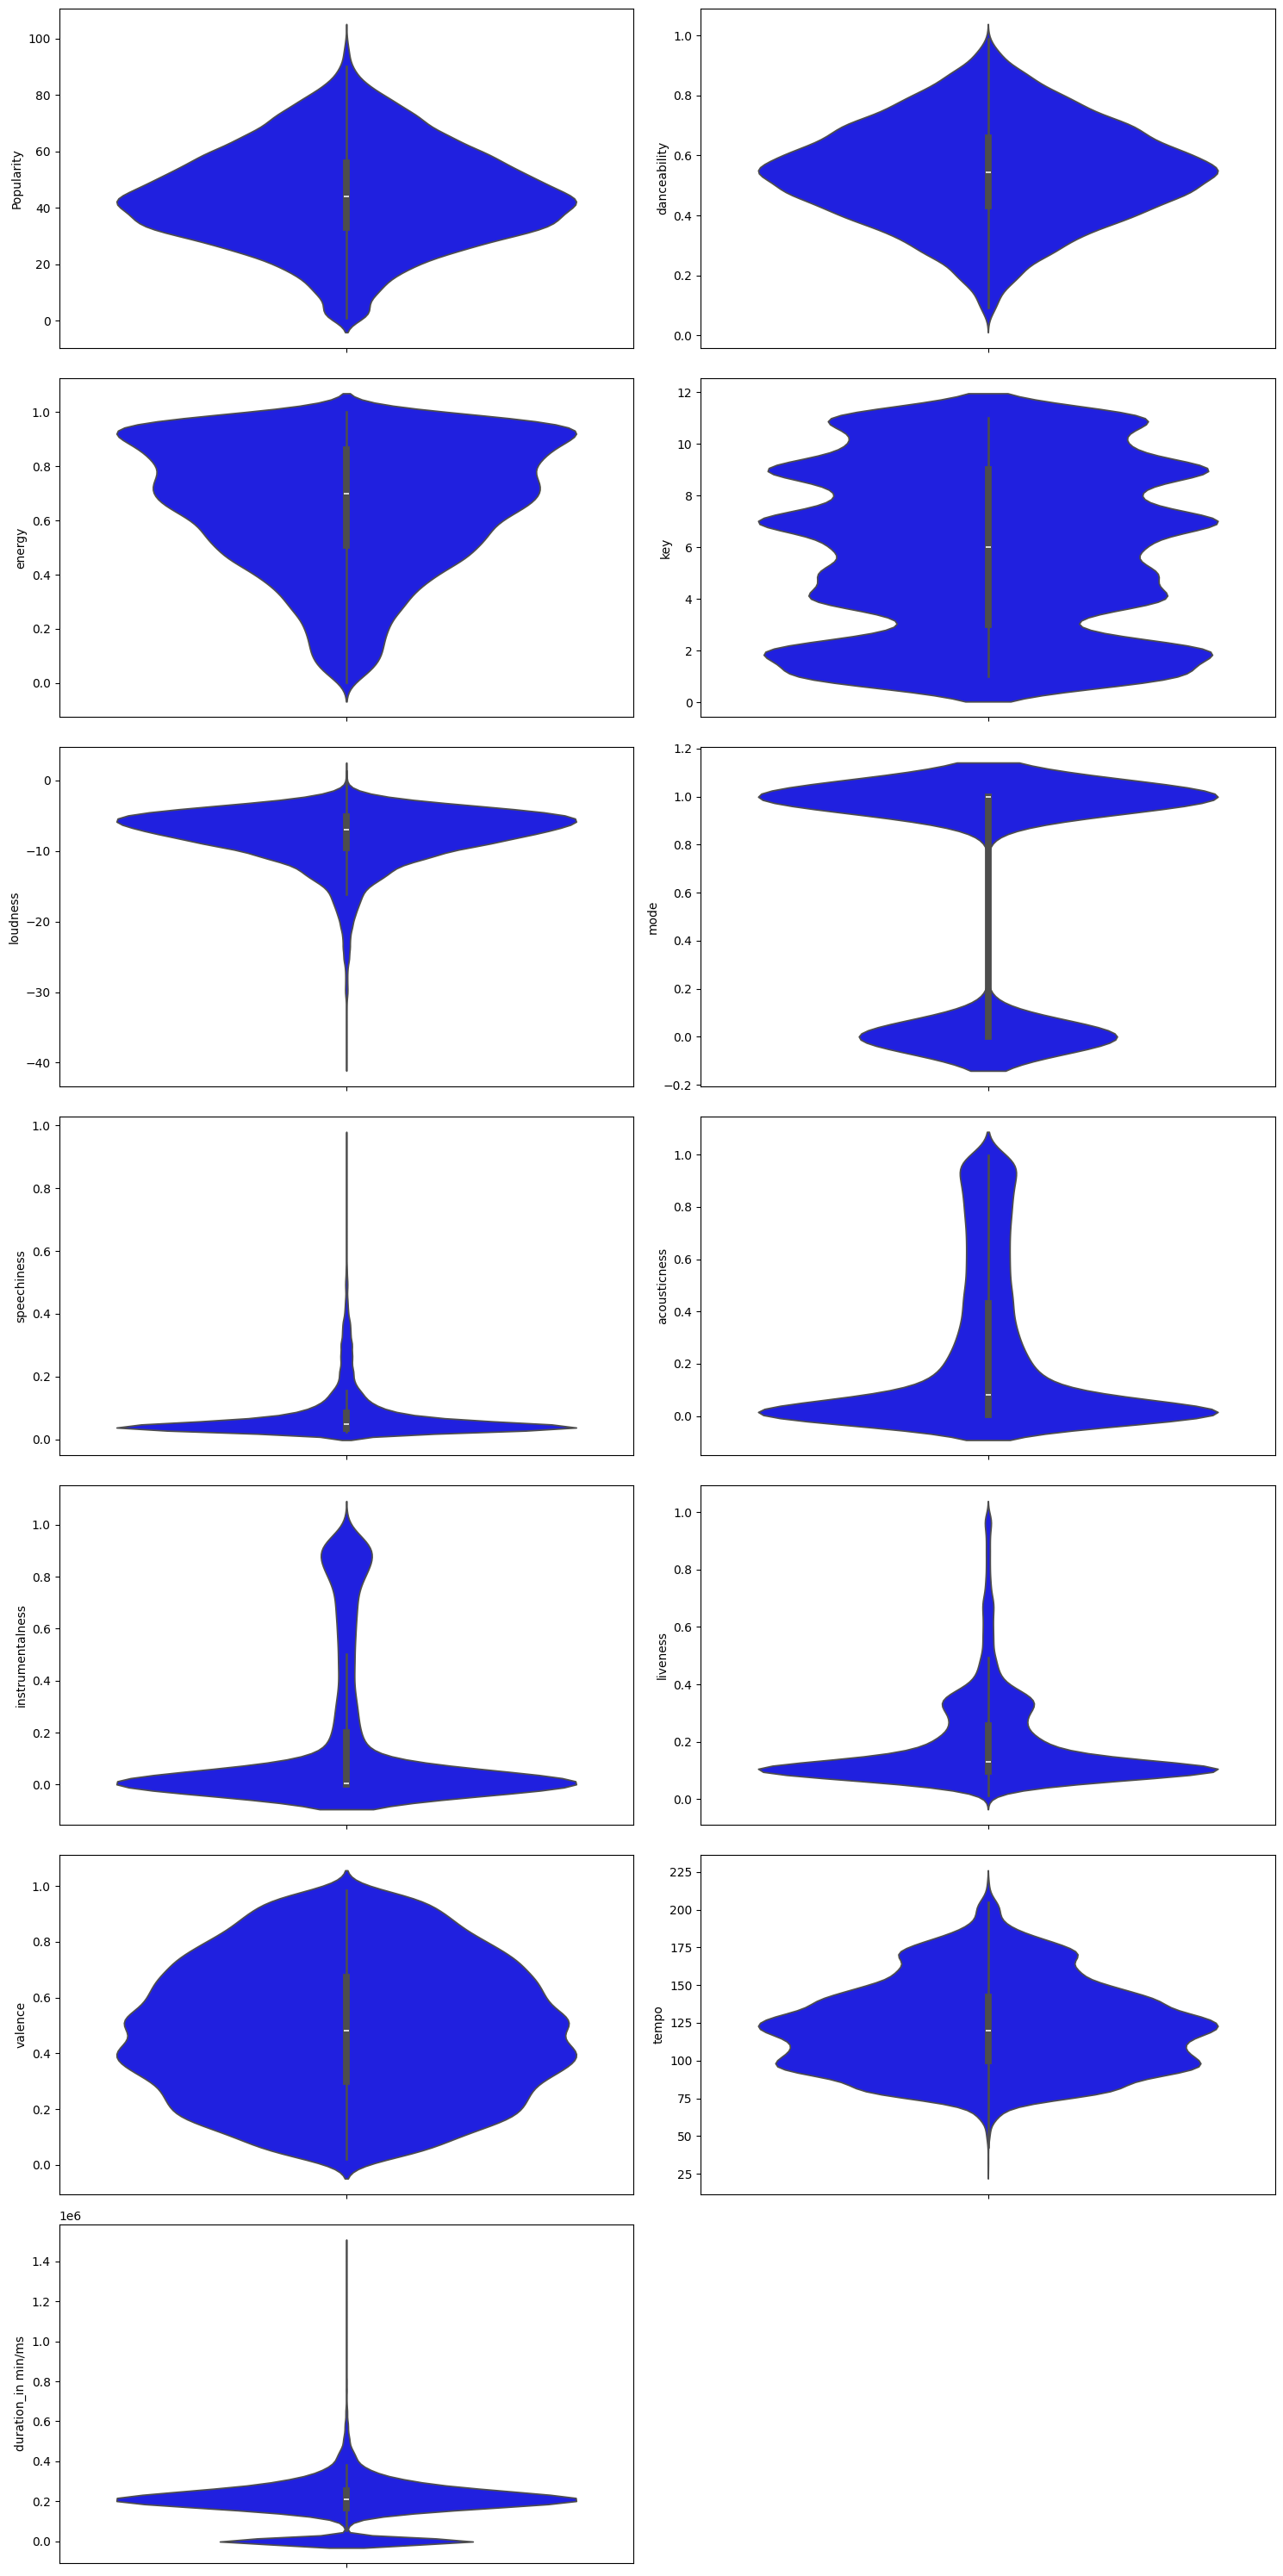

In [31]:
#give me some more insightful visualizations
fig = plt.figure(figsize=(15, 30))
for i in range(1, 14):
    fig.add_subplot(7, 2, i)
    sns.violinplot(y=temp.iloc[:, i], color='blue')
plt.tight_layout()
plt.show()


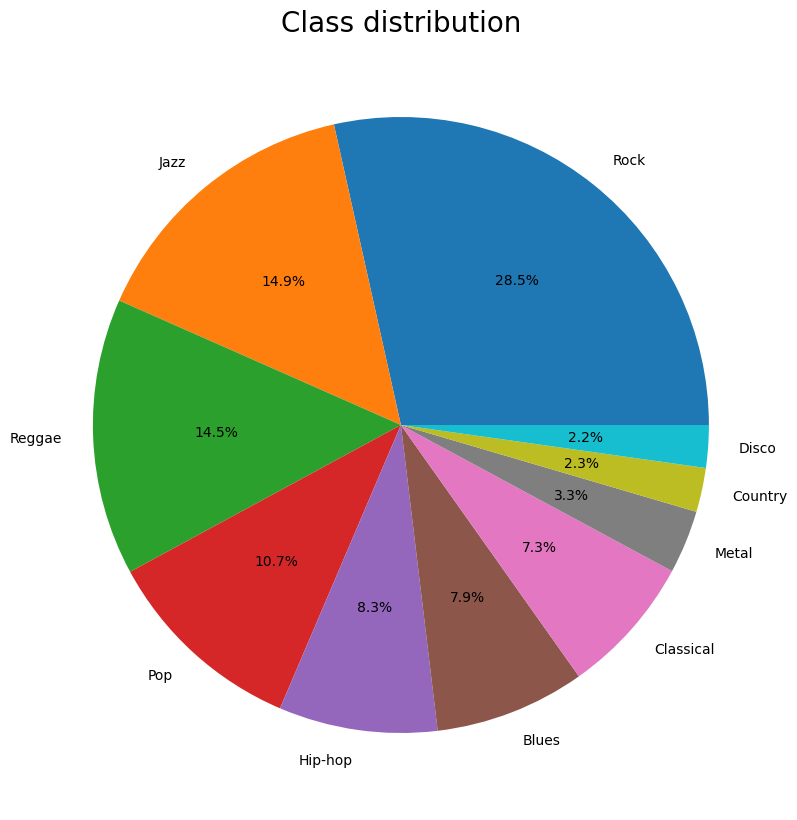

In [32]:
#I want a 3d pie chart to see the distribution of the target variable
plt.figure(figsize=(10, 10))
plt.pie(train['Class'].value_counts(), labels=train['Class'].value_counts().index, autopct='%1.1f%%')
plt.title('Class distribution', fontsize=20)
plt.show()

In [33]:
train.isna().sum()

Id                       0
Artist Name              0
Track Name               0
Popularity             333
danceability             0
energy                   0
key                   1609
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3541
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                  500
dtype: int64

## DATA SCALING

In [34]:
train.drop(['Id','Artist Name','Track Name','Class'], axis=1, inplace=True)
test.drop(['Id','Artist Name','Track Name'], axis=1, inplace=True)

def clean_data(df):
    df['Popularity'].fillna(float(df['Popularity'].mean()), inplace=True)
    df['key'].fillna(int(df['key'].mean()), inplace=True)
    df['instrumentalness'].fillna(float(df['instrumentalness'].mean()), inplace=True)
    return df

In [35]:
train = clean_data(train)
test = clean_data(test)

In [36]:
rb.fit(train)
train = rb.transform(train)
test = rb.transform(test)

In [37]:
model = RandomForestClassifier(random_state = 2022, n_jobs = -1, n_estimators = 1000, verbose=1)
model.fit(train, train_targets)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    9.0s finished


RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=2022,
                       verbose=1)

In [38]:
#save the model using pickle 
filename = 'finalized_model'
joblib.dump(model, filename , compress = 3)

['finalized_model']

In [39]:
filename = 'finalized_model'
model = joblib.load(filename)

In [40]:
y_pred_t = model.predict(test)
print("\nACCURACY OF THE MODEL: ", metrics.accuracy_score(test_targets, y_pred_t))

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s



ACCURACY OF THE MODEL:  0.8280555555555555


[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 1000 out of 1000 | elapsed:    0.3s finished


In [41]:
y_pred = model.predict(test)


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 1000 out of 1000 | elapsed:    0.3s finished


## HYPERPARAMETER TUNING

In [42]:
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [43]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [44]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train, train_targets)

#save this model in a file named randomised_hypeparameter_tuning

Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: 

In [ ]:
filename = 'randomised_hypeparameter_tuning'
pickle.dump(rf_random, open(filename, 'wb'))


In [ ]:
test_pred = rf_random.predict(train)
print ("\nAccuracy score on test data : \n")
print (metrics.accuracy_score(train_targets, test_pred))

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    precision = precision_score(test_labels, predictions , average='micro')
    accuracy = accuracy_score(test_labels, predictions )
    recall = recall_score(test_labels, predictions ,average='micro')
    f1 = f1_score(test_labels, predictions , average='micro')
    
    print('Model Performance')
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'Precision: {precision * 100:.2f}%')
    print(f'Recall: {recall * 100:.2f}%')
    print(f'F1 Score: {f1 * 100:.2f}%')
    
    return accuracy
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(train, train_targets)
base_accuracy = evaluate(base_model, test, test_targets)

In [ ]:
# Fit the grid search to the data
grid_search.fit(train, train_targets)
grid_search.best_params_

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test, test_targets)

#save this model in a file named grid_search_hypeparameter_tuning

In [ ]:
filename = 'grid_search_hypeparameter_tuning'
pickle.dump(grid_search, open(filename, 'wb'))

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test, test_targets)

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

## MODEL LOADING AND PREDICTION

In [ ]:
test

array([[ 0.01998387,  0.6460177 , -0.08215297, ..., -0.71333337,
        -0.10300543,  0.        ],
       [-1.30434783, -0.37168142,  0.22096317, ...,  1.01881403,
         0.8636742 ,  0.        ],
       [ 1.56521739,  0.49115044, -1.15580737, ..., -0.38135307,
         0.27179332,  0.        ],
       ...,
       [-1.13043478,  1.05309735,  0.3427762 , ...,  0.21225786,
         1.50080788,  0.        ],
       [-0.26086957, -0.45132743, -0.84419263, ...,  1.14126229,
        -0.30361314, -1.        ],
       [ 1.08695652,  0.57522124,  0.36543909, ...,  0.0514112 ,
        -0.24432828,  0.        ]])

In [ ]:
# load the model using joblib and predict a sing row of data
loaded_model = joblib.load("finalized_model")
result = loaded_model.predict(test)
#map all the genre number to actual genre name

print (result)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s


[ 9  6  9 ...  1  2 10]


[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 1000 out of 1000 | elapsed:    0.3s finished
